In [420]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [421]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [422]:
df = pd.read_csv('./csv파일/데이터셋_1.csv',encoding='cp949')

In [423]:
df

,요일,사고내용,사고유형,가해자성별,피해자성별,연령가해자,연령피해자,가해자음주,법규위반가해자,행동유형가해자,...,교차로형태,사망자수,중상자수,경상자수,부상신고자수,발생시각,EPDO1,EPDO2,가해자차량용도,심각도
0,화,경상,보도통행중,여,여,18,68,기타불명,안전운전 의무 불이행,직진중,...,교차로아님,0,0,1,0,15,2,3,자전거,0
1,토,중상,횡단중,남,여,80,75,기타불명,안전운전 의무 불이행,직진중,...,교차로아님,0,1,0,0,9,32,6,비사업용_승용차,1
2,목,경상,길가장자리구역통행중,남,남,18,68,기타불명,안전운전 의무 불이행,직진중,...,교차로아님,0,0,1,0,19,2,3,비사업용_승용차,0
3,목,중상,길가장자리구역통행중,남,여,22,89,기타불명,안전운전 의무 불이행,후진중,...,교차로아님,0,1,0,0,11,32,6,비사업용_화물차,1
4,목,중상,횡단중,여,여,45,85,기타불명,안전운전 의무 불이행,직진중,...,교차로아님,0,1,0,0,12,32,6,비사업용_승용차,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58054,월,경상,길가장자리구역통행중,여,여,53,65,기타불명,안전운전 의무 불이행,직진중,...,교차로아님,0,0,1,0,16,2,3,비사업용_승용차,0
58055,금,경상,보도통행중,여,남,28,71,해당 없음,기타,후진중,...,교차로,0,0,1,0,17,2,3,비사업용_승용차,0
58056,금,중상,차도통행중,여,남,32,76,해당 없음,안전운전 의무 불이행,직진중,...,교차로아님,0,1,0,0,10,32,6,비사업용_승용차,1
58057,토,중상,기타,남,여,75,77,해당 없음,안전운전 의무 불이행,직진중,...,교차로아님,0,1,0,0,10,32,6,비사업용_승용차,1


---

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   요일           58059 non-null  object
 1   사고내용         58059 non-null  object
 2   사고유형         58059 non-null  object
 3   가해자성별        58059 non-null  object
 4   피해자성별        58059 non-null  object
 5   연령가해자        58059 non-null  int64 
 6   연령피해자        58059 non-null  int64 
 7   가해자음주        58059 non-null  object
 8   법규위반가해자      58059 non-null  object
 9   행동유형가해자      58059 non-null  object
 10  신체상해정도가해자    58059 non-null  object
 11  신체상해정도피해자    58059 non-null  object
 12  가해자신체상해주부위   58059 non-null  object
 13  피해자신체상해주부위   58059 non-null  object
 14  차량용도가해자_중분류  58059 non-null  object
 15  도로종류         58059 non-null  object
 16  도로형태         58059 non-null  object
 17  노인보호구역_여부    58059 non-null  object
 18  어린이보호구역_여부   58059 non-null  object
 19  자전거도로_여부     34691 non-nu

# 1. 빈도분석

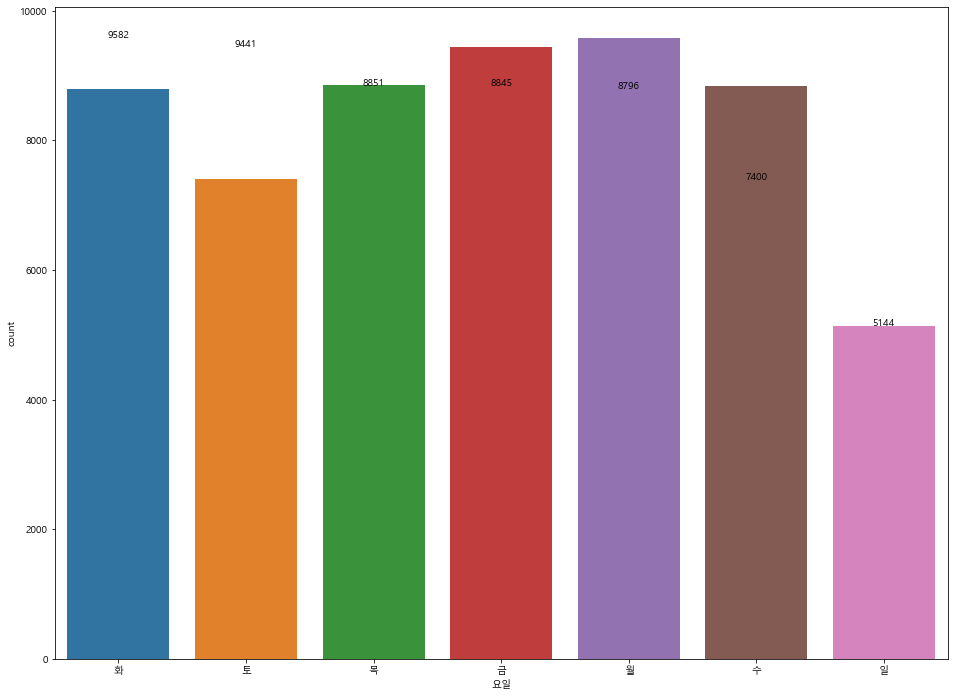

In [425]:
cnt = df["요일"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="요일", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [426]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,월,금,목,수,화,토,일
요일,9582,9441,8851,8845,8796,7400,5144


In [490]:
(len(df[df['요일']=='일'])+len(df[df['요일']=='토']))/len(df['요일'])

0.21605608088323947

---

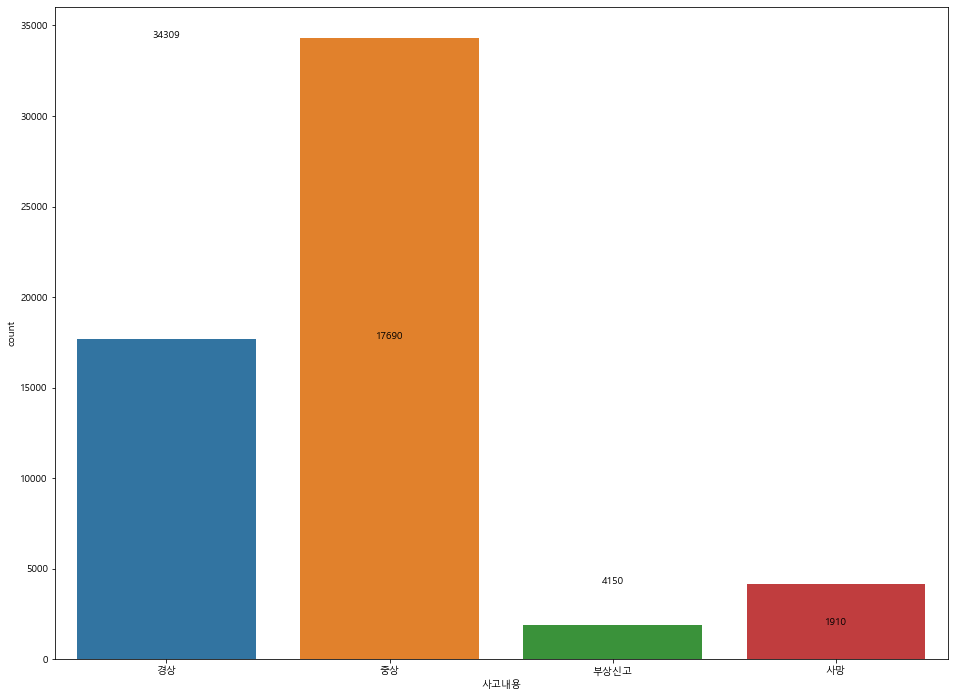

In [427]:
cnt = df["사고내용"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="사고내용", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [428]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,중상,경상,사망,부상신고
사고내용,34309,17690,4150,1910


In [492]:
len(df[df['사고내용']=='중상'])/len(df['사고내용'])

0.5909333608915069

---

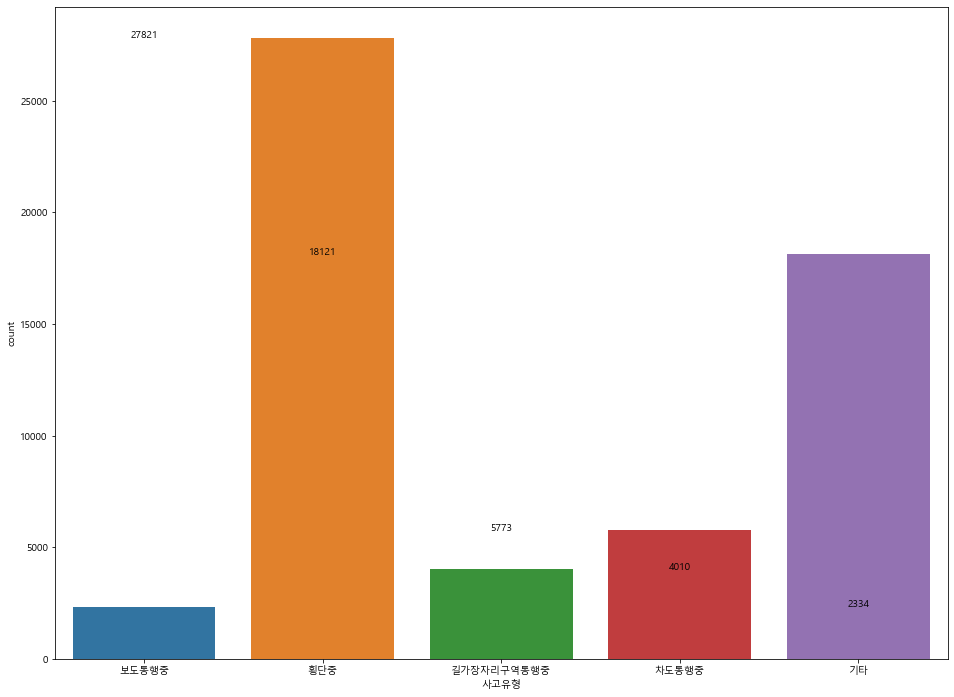

In [429]:
cnt = df["사고유형"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="사고유형", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [430]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,횡단중,기타,차도통행중,길가장자리구역통행중,보도통행중
사고유형,27821,18121,5773,4010,2334


In [493]:
(len(df[df['사고유형']=='횡단중'])/len(df['사고유형']))*100

47.9184967016311

---

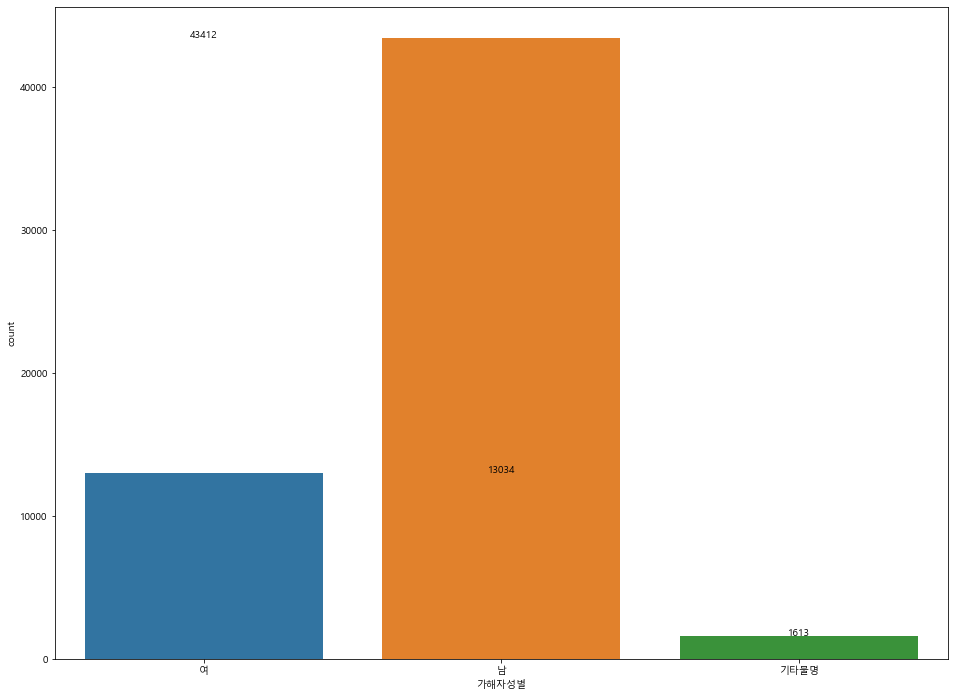

In [431]:
cnt = df["가해자성별"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="가해자성별", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [432]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,남,여,기타불명
가해자성별,43412,13034,1613


---

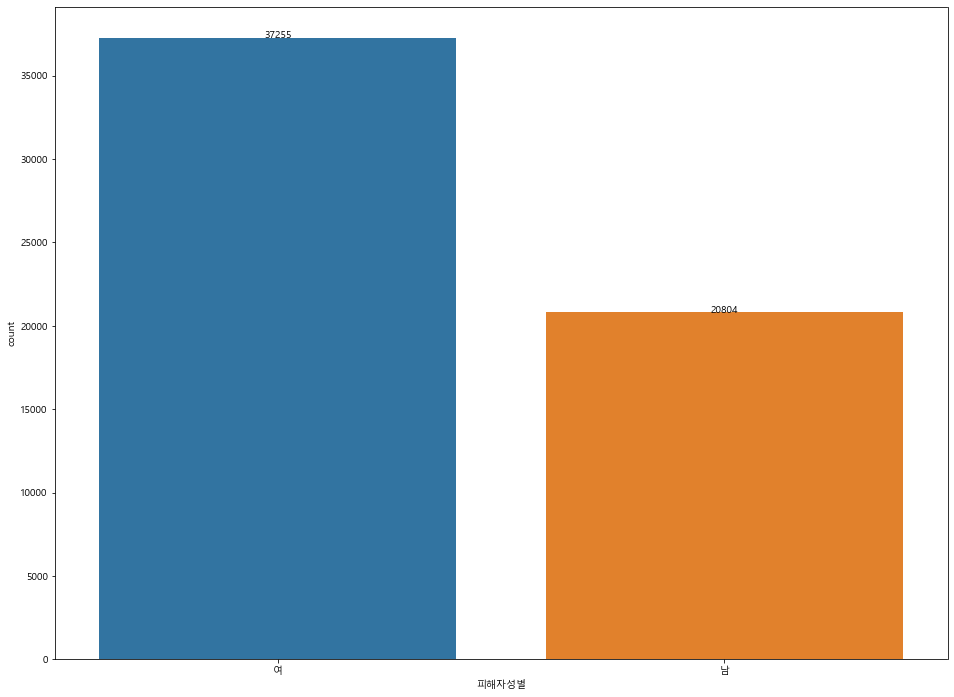

In [433]:
cnt = df["피해자성별"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="피해자성별", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [434]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,여,남
피해자성별,37255,20804


---

<AxesSubplot:xlabel='연령가해자', ylabel='count'>

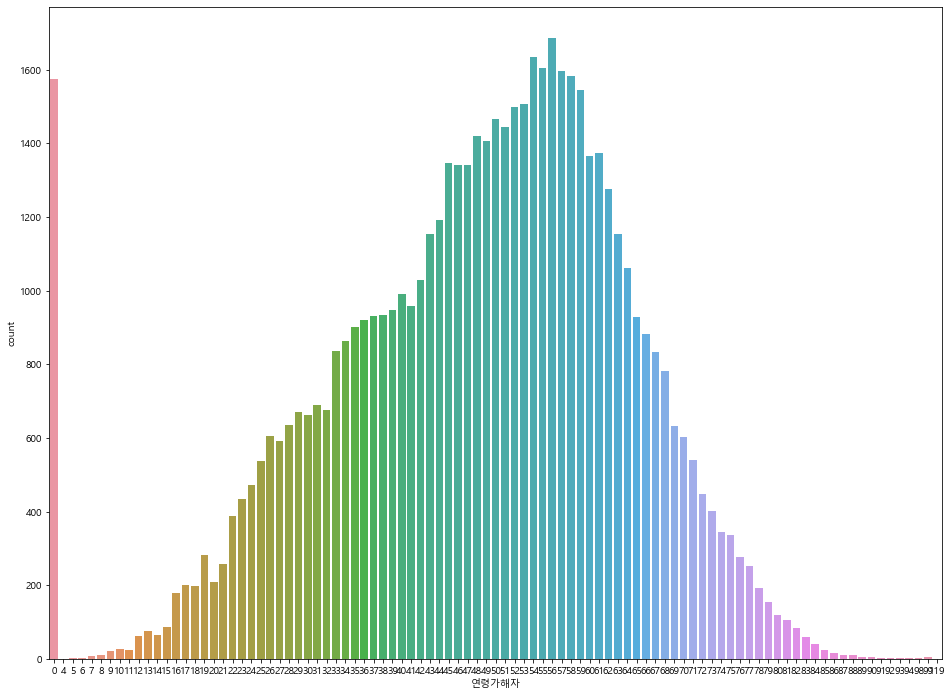

In [435]:
cnt = df["연령가해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=df, x="연령가해자")

In [436]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,56,54,55,57,58,0,59,53,52,50,...,90,94,91,93,92,98,5,6,4,119
연령가해자,1687,1635,1605,1597,1583,1574,1545,1506,1500,1466,...,4,3,3,2,2,2,2,2,1,1


---

<AxesSubplot:xlabel='연령피해자', ylabel='count'>

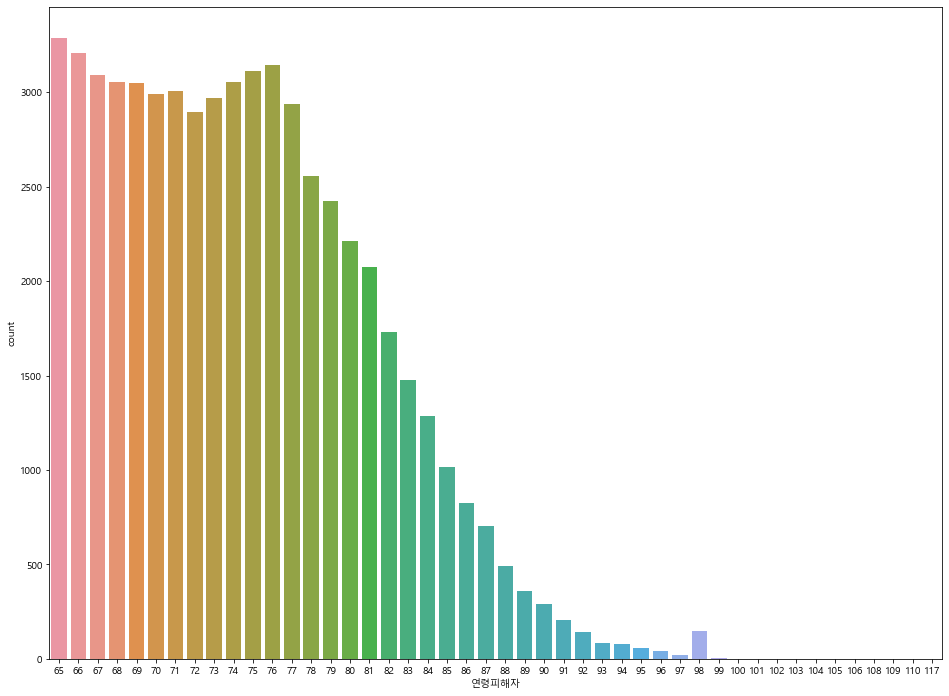

In [437]:
cnt = df["연령피해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=df, x="연령피해자", ax=ax1)

In [438]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,65,66,76,75,67,74,68,69,71,70,...,105,106,108,103,104,101,100,109,110,117
연령피해자,3289,3210,3143,3114,3091,3056,3053,3050,3009,2991,...,2,2,2,1,1,1,1,1,1,1


---

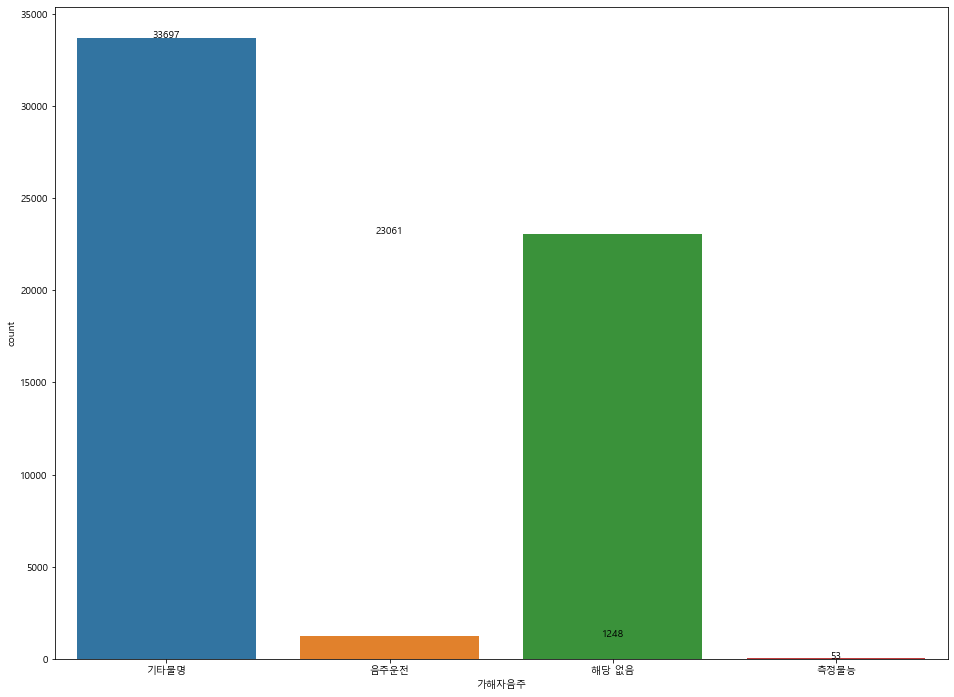

In [439]:
cnt = df["가해자음주"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="가해자음주", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [440]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,기타불명,해당 없음,음주운전,측정불능
가해자음주,33697,23061,1248,53


In [494]:
len(df[df['가해자음주']=='음주운전'])/len(df['가해자음주'])

0.021495375393995764

---

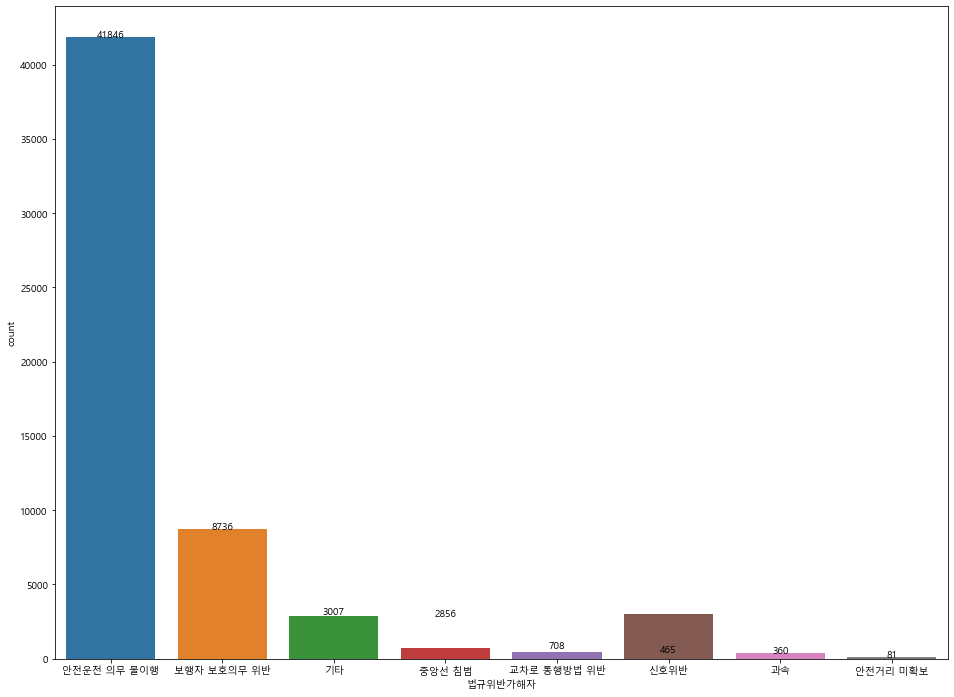

In [441]:
cnt = df["법규위반가해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="법규위반가해자", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [442]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,안전운전 의무 불이행,보행자 보호의무 위반,신호위반,기타,중앙선 침범,교차로 통행방법 위반,과속,안전거리 미확보
법규위반가해자,41846,8736,3007,2856,708,465,360,81


---

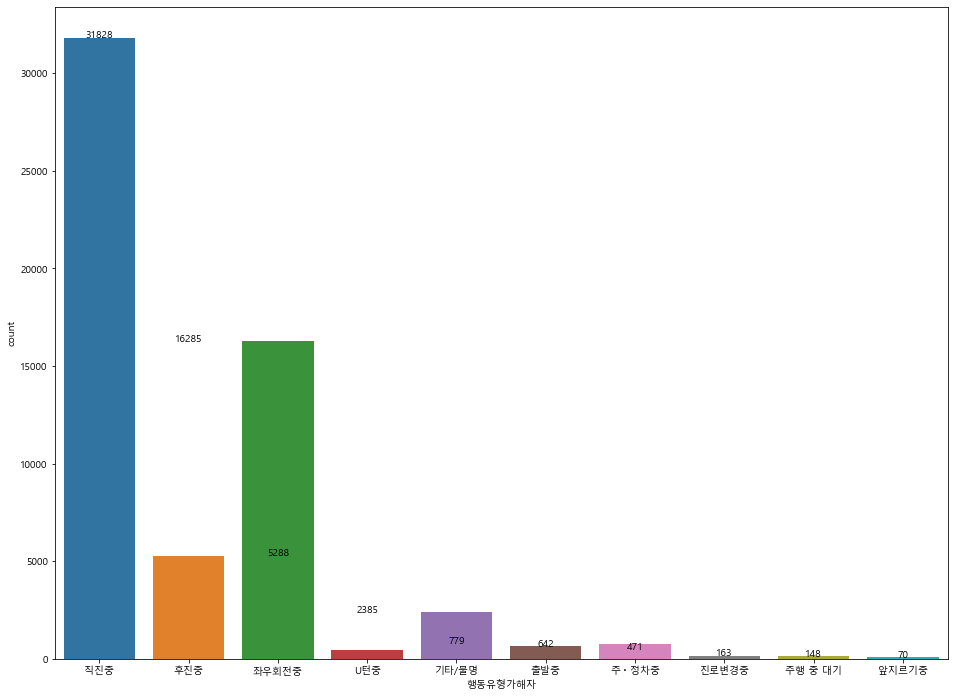

In [496]:
cnt = df["행동유형가해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="행동유형가해자", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [497]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,직진중,좌우회전중,후진중,기타/불명,주ㆍ정차중,출발중,U턴중,주행 중 대기,진로변경중,앞지르기중
행동유형가해자,31828,16285,5288,2385,779,642,471,163,148,70


In [498]:
(len(df[df['행동유형가해자']=='직진중'])/len(df['행동유형가해자']))*100

54.820096798084705

---

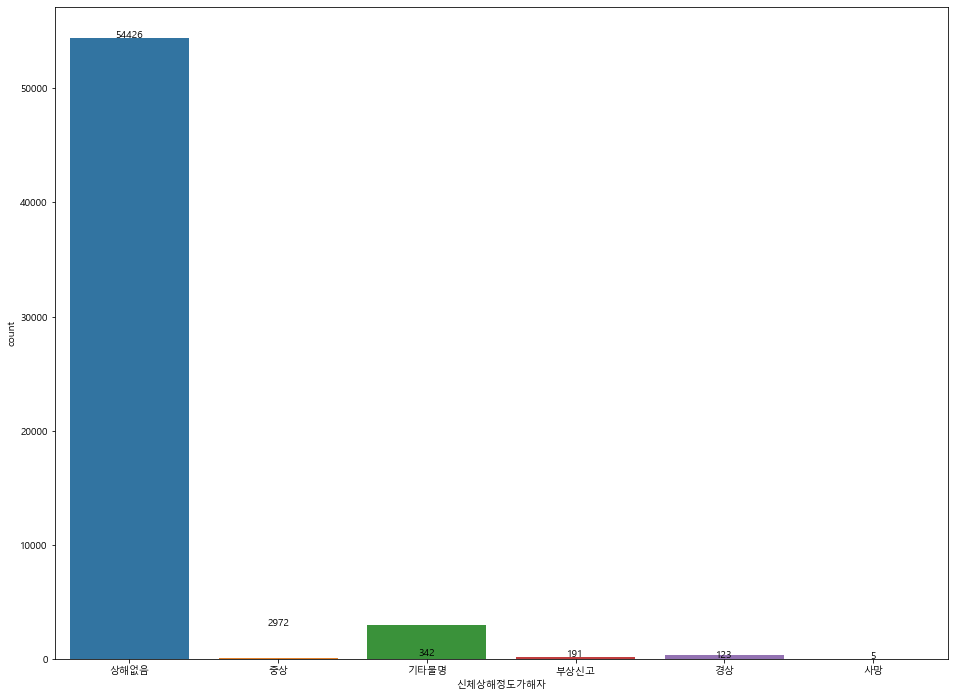

In [444]:
cnt = df["신체상해정도가해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="신체상해정도가해자", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [445]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,상해없음,기타불명,경상,부상신고,중상,사망
신체상해정도가해자,54426,2972,342,191,123,5


---

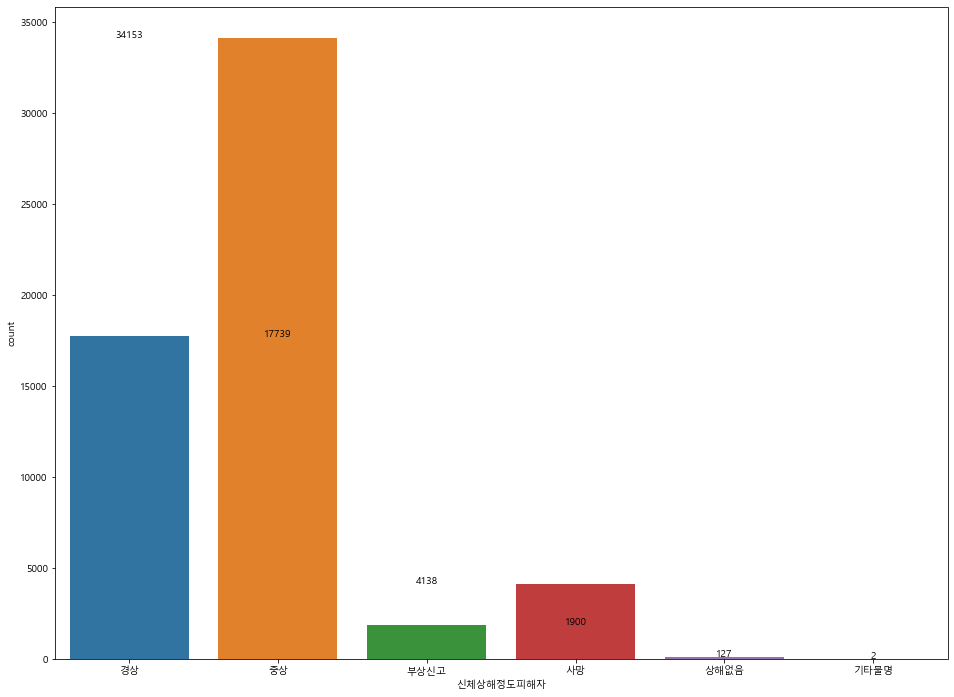

In [446]:
cnt = df["신체상해정도피해자"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="신체상해정도피해자", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [447]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,중상,경상,사망,부상신고,상해없음,기타불명
신체상해정도피해자,34153,17739,4138,1900,127,2


In [500]:
(len(df[df['신체상해정도피해자']=='경상'])/len(df['신체상해정도피해자']))*100

30.55340257324446

---

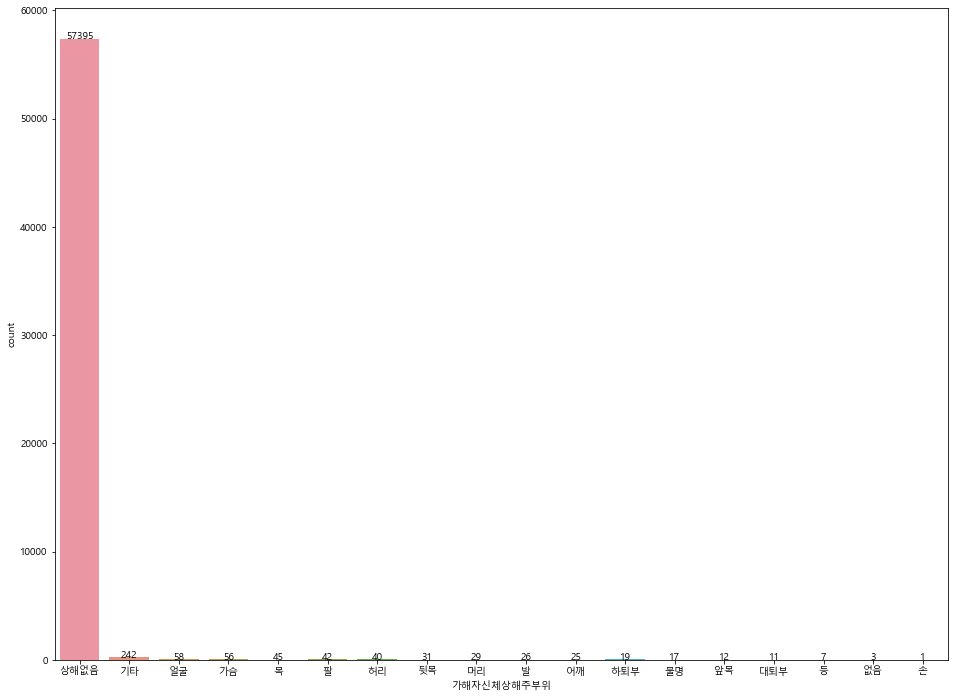

In [448]:
cnt = df["가해자신체상해주부위"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="가해자신체상해주부위", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [449]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,상해없음,기타,얼굴,하퇴부,가슴,허리,팔,발,머리,어깨,대퇴부,손,목,불명,뒷목,앞목,없음,등
가해자신체상해주부위,57395,242,58,56,45,42,40,31,29,26,25,19,17,12,11,7,3,1


In [501]:
(len(df[df['가해자신체상해주부위']=='상해없음'])/len(df['가해자신체상해주부위']))*100

98.85633579634509

---

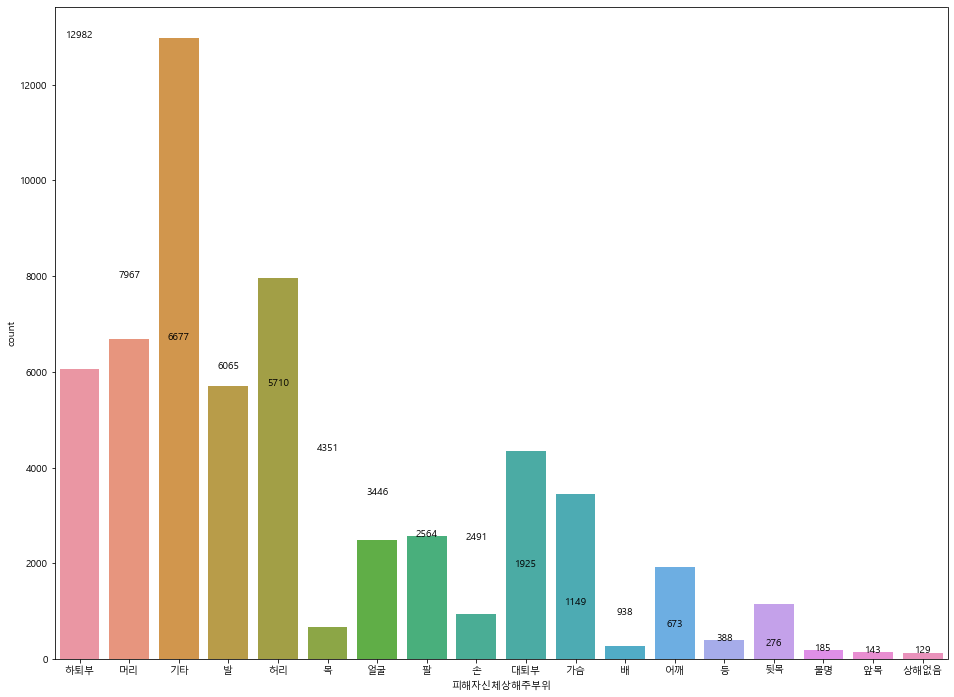

In [502]:
cnt = df["피해자신체상해주부위"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="피해자신체상해주부위", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [503]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,기타,허리,머리,하퇴부,발,대퇴부,가슴,팔,얼굴,어깨,뒷목,손,목,등,배,불명,앞목,상해없음
피해자신체상해주부위,12982,7967,6677,6065,5710,4351,3446,2564,2491,1925,1149,938,673,388,276,185,143,129


In [514]:
(len(df[df['피해자신체상해주부위']=='불명'])+len(df[df['피해자신체상해주부위']=='기타'])+len(df[df['피해자신체상해주부위']=='상해없음']))/len(df['피해자신체상해주부위'])

0.229008422466801

---

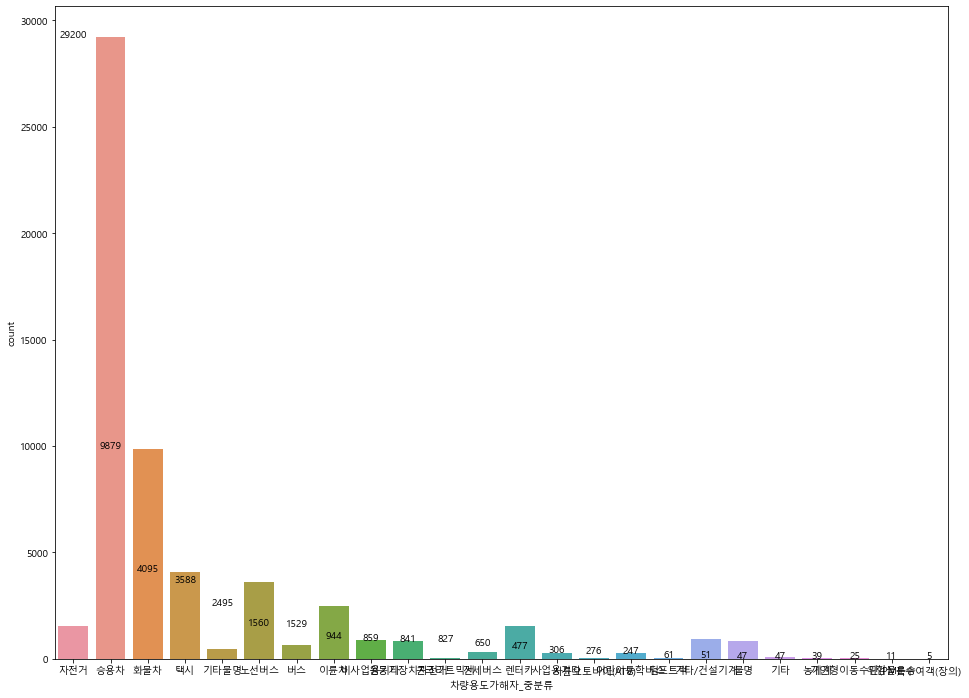

In [450]:
cnt = df["차량용도가해자_중분류"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="차량용도가해자_중분류", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [451]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,승용차,화물차,택시,노선버스,이륜차,렌터카,자전거,기타/건설기계,비사업용기타,불명,...,사업용기타,어린이통학버스,기타,덤프트럭,개인형이동수단(PM),사륜오토바이(ATV),농기계,콘크리트믹서,위험물운송,특수여객(장의)
차량용도가해자_중분류,29200,9879,4095,3588,2495,1560,1529,944,859,841,...,276,247,61,51,47,47,39,25,11,5


In [519]:
(len(df[df['차량용도가해자_중분류']=='노선버스'])/len(df['차량용도가해자_중분류']))*100

6.179920425773782

---

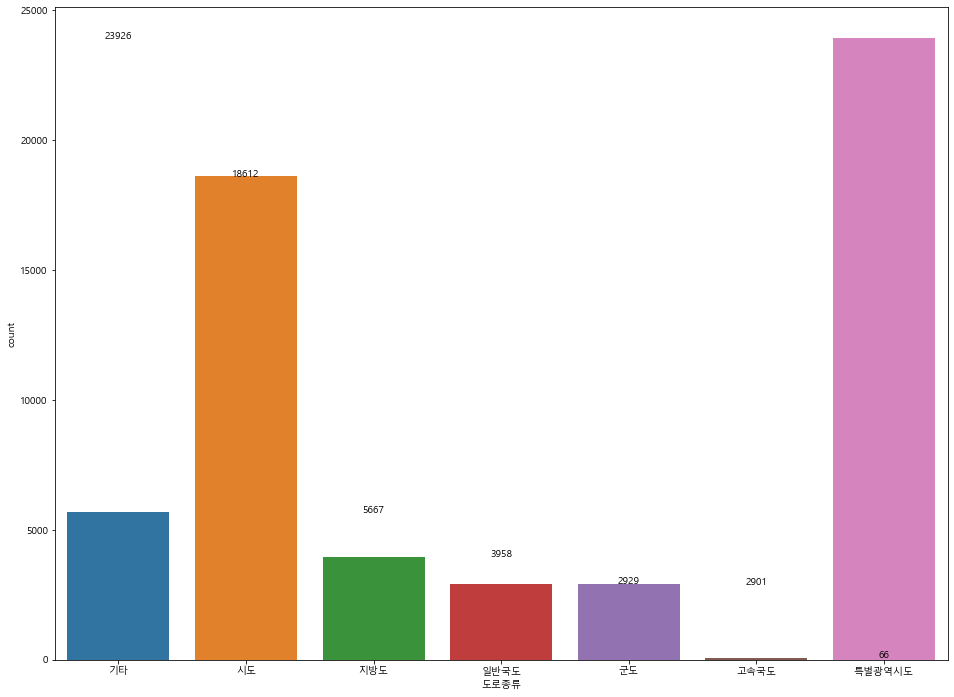

In [452]:
cnt = df["도로종류"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="도로종류", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [453]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,특별광역시도,시도,기타,지방도,일반국도,군도,고속국도
도로종류,23926,18612,5667,3958,2929,2901,66


In [521]:
(len(df[df['도로종류']=='시도'])/len(df['도로종류']))*100

32.05704541931483

---

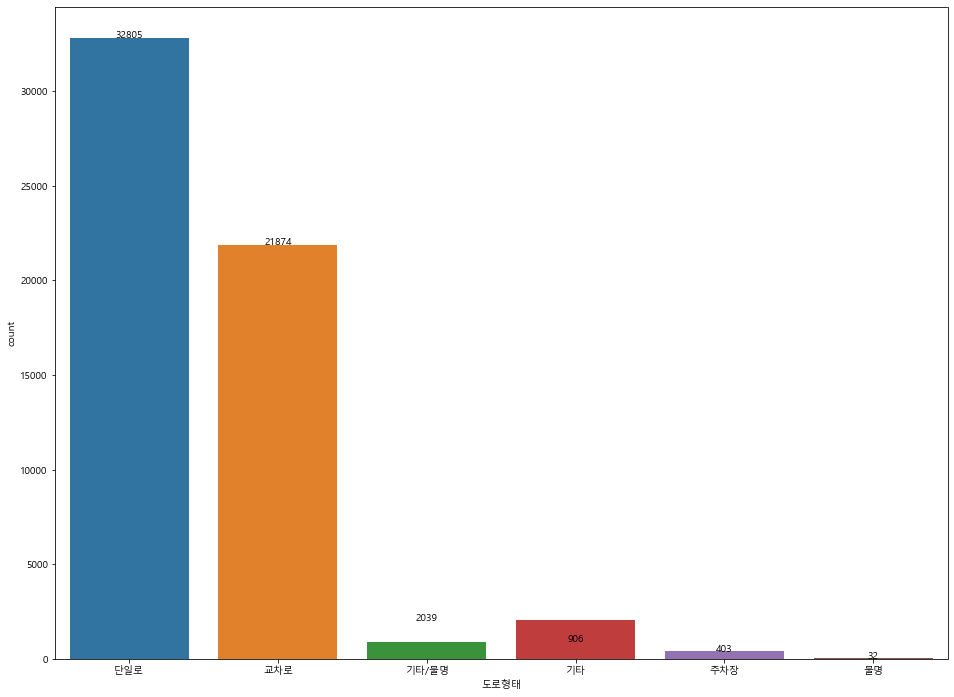

In [454]:
cnt = df["도로형태"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="도로형태", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [455]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,단일로,교차로,기타,기타/불명,주차장,불명
도로형태,32805,21874,2039,906,403,32


In [524]:
(len(df[df['도로형태']=='교차로'])/len(df['도로형태']))*100

37.67546805835443

---

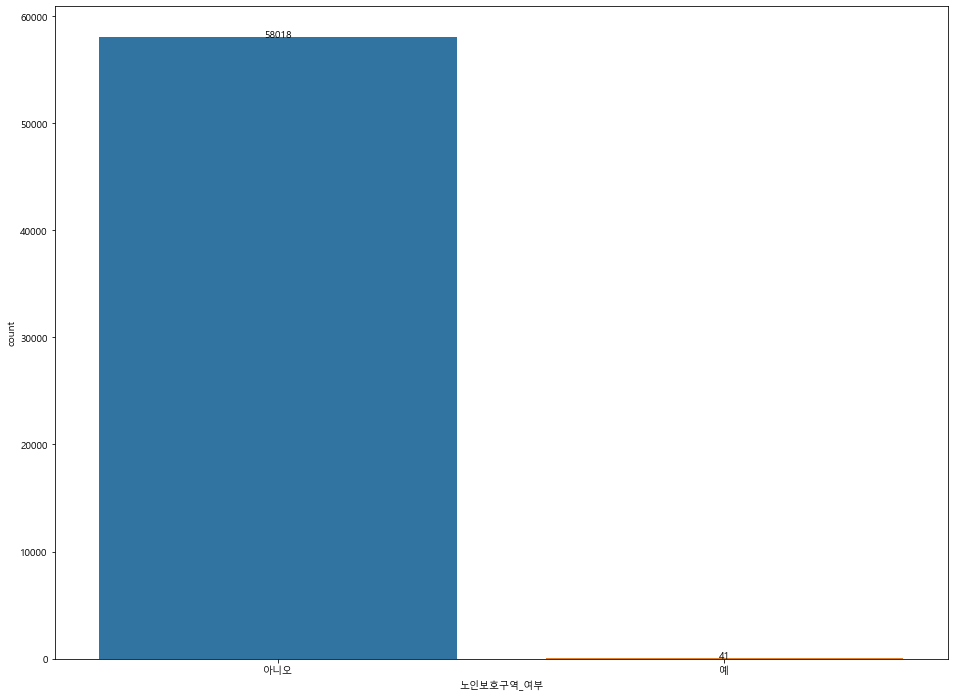

In [456]:
cnt = df["노인보호구역_여부"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="노인보호구역_여부", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [457]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,아니오,예
노인보호구역_여부,58018,41


---

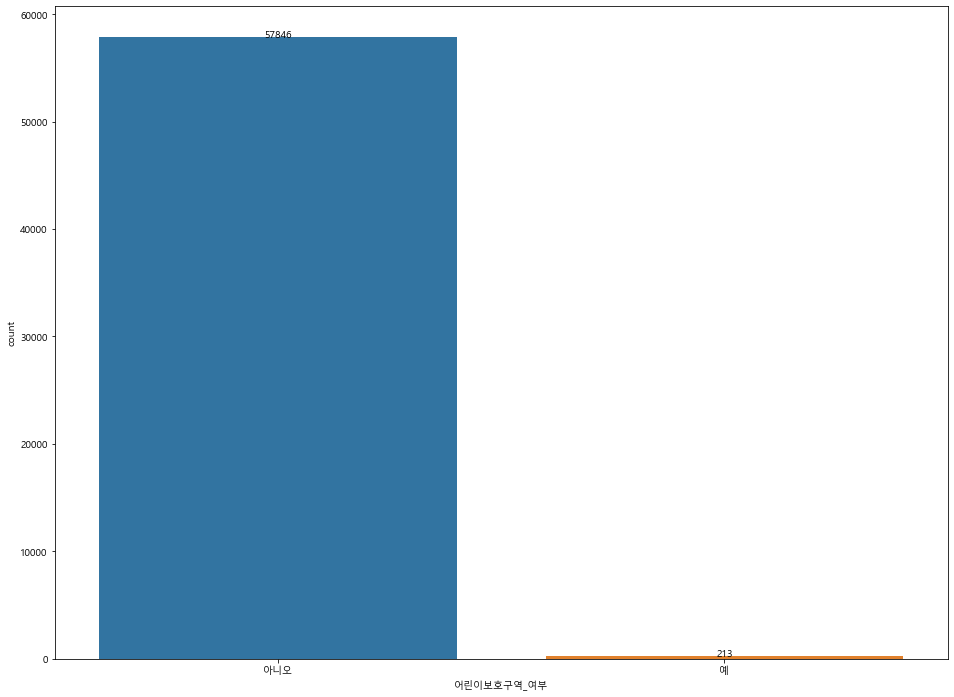

In [458]:
cnt = df["어린이보호구역_여부"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="어린이보호구역_여부", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [459]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,아니오,예
어린이보호구역_여부,57846,213


---

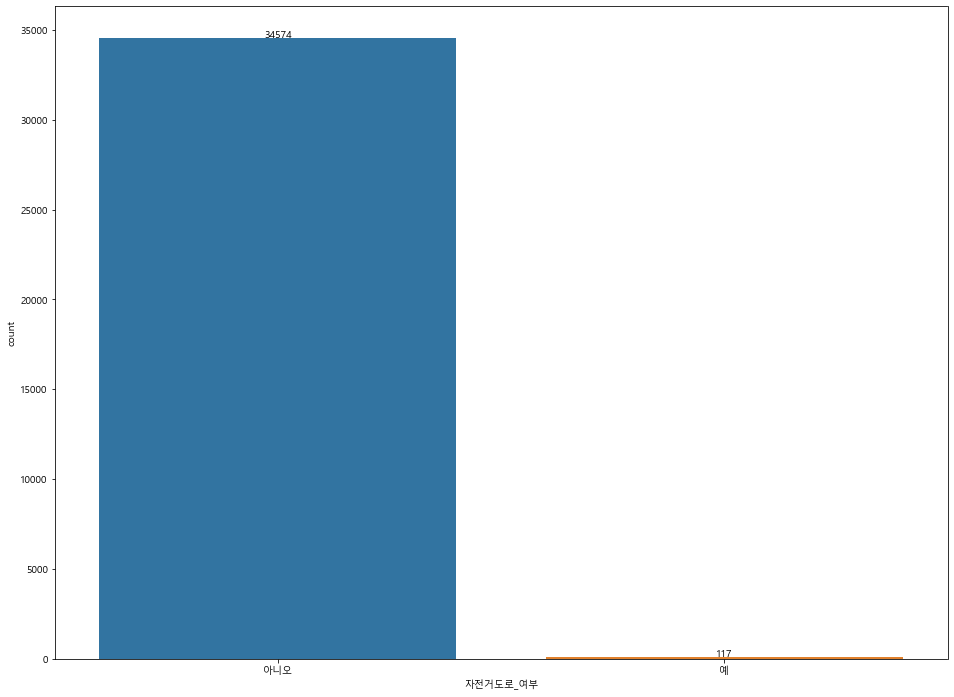

In [460]:
cnt = df["자전거도로_여부"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="자전거도로_여부", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [461]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,아니오,예
자전거도로_여부,34574,117


--

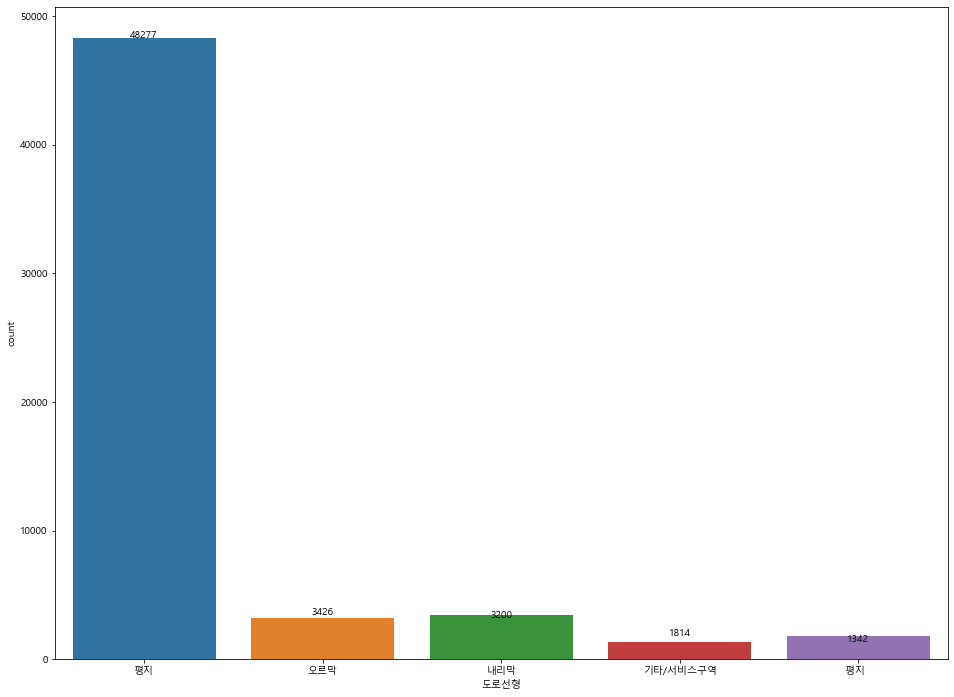

In [462]:
cnt = df["도로선형"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="도로선형", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [463]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,평지,내리막,오르막,평지,기타/서비스구역
도로선형,48277,3426,3200,1814,1342


In [529]:
(len(df[df['도로선형']=='오르막'])+len(df[df['도로선형']=='내리막']))/len(df['도로선형'])

0.11412528634664737

---

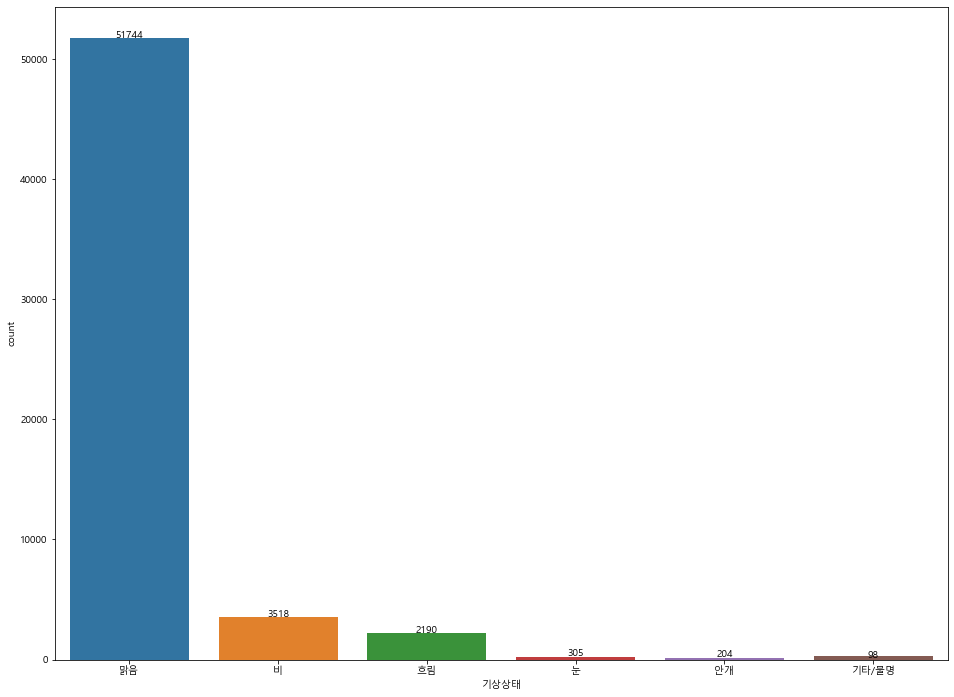

In [464]:
cnt = df["기상상태"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="기상상태", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [465]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,맑음,비,흐림,기타/불명,눈,안개
기상상태,51744,3518,2190,305,204,98


In [531]:
len(df[df['기상상태']=='맑음'])/len(df['기상상태'])

0.8912313336433628

---

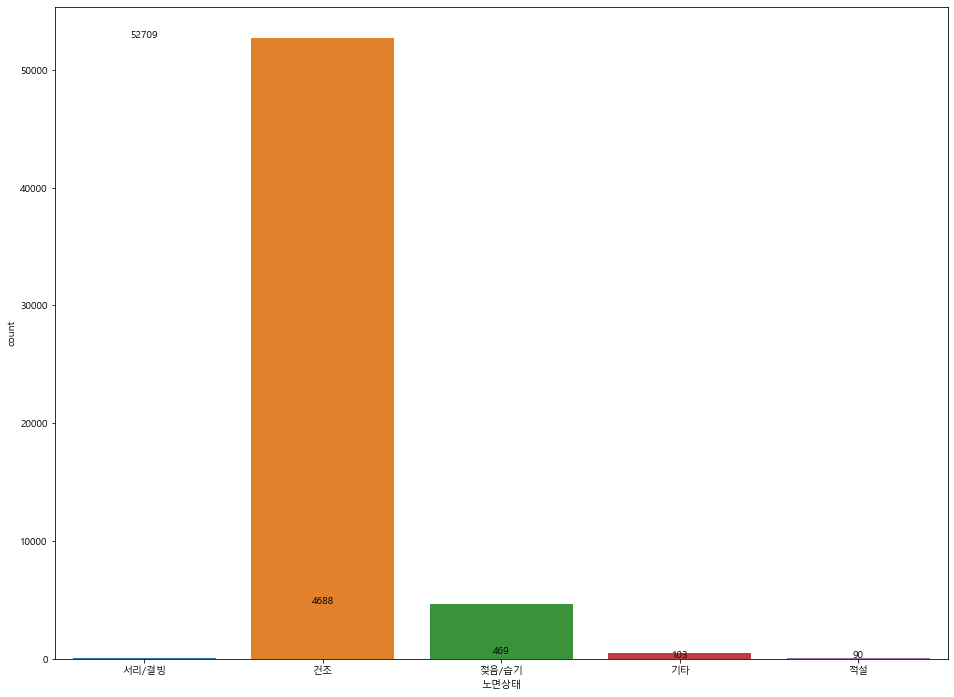

In [466]:
cnt = df["노면상태"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="노면상태", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [467]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,건조,젖음/습기,기타,서리/결빙,적설
노면상태,52709,4688,469,103,90


In [532]:
len(df[df['노면상태']=='젖음/습기'])/len(df['노면상태'])

0.08074544859539434

---

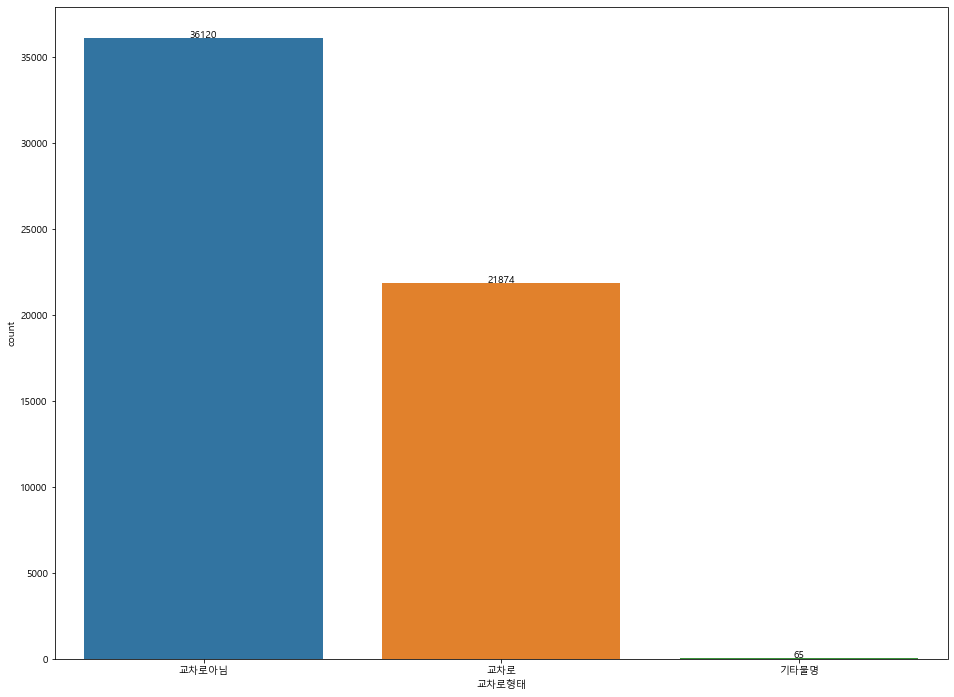

In [468]:
cnt = df["교차로형태"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="교차로형태", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [469]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,교차로아님,교차로,기타불명
교차로형태,36120,21874,65


---

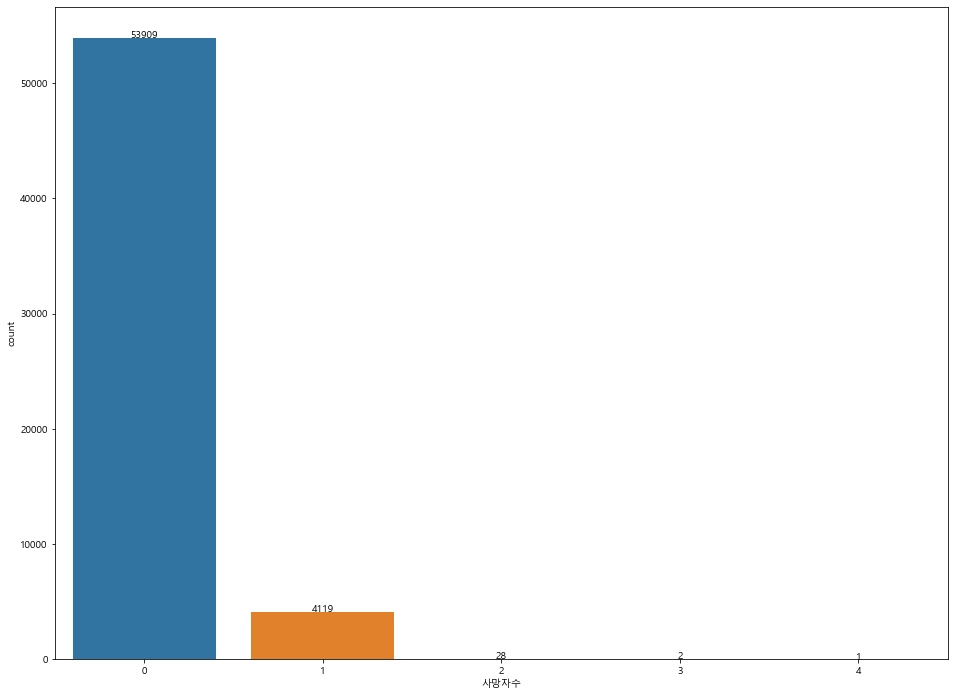

In [470]:
cnt = df["사망자수"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="사망자수", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [471]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0,1,2,3,4
사망자수,53909,4119,28,2,1


In [535]:
(1-(len(df[df['사망자수']==0])/len(df['사망자수'])))*100

7.1479012728431375

---

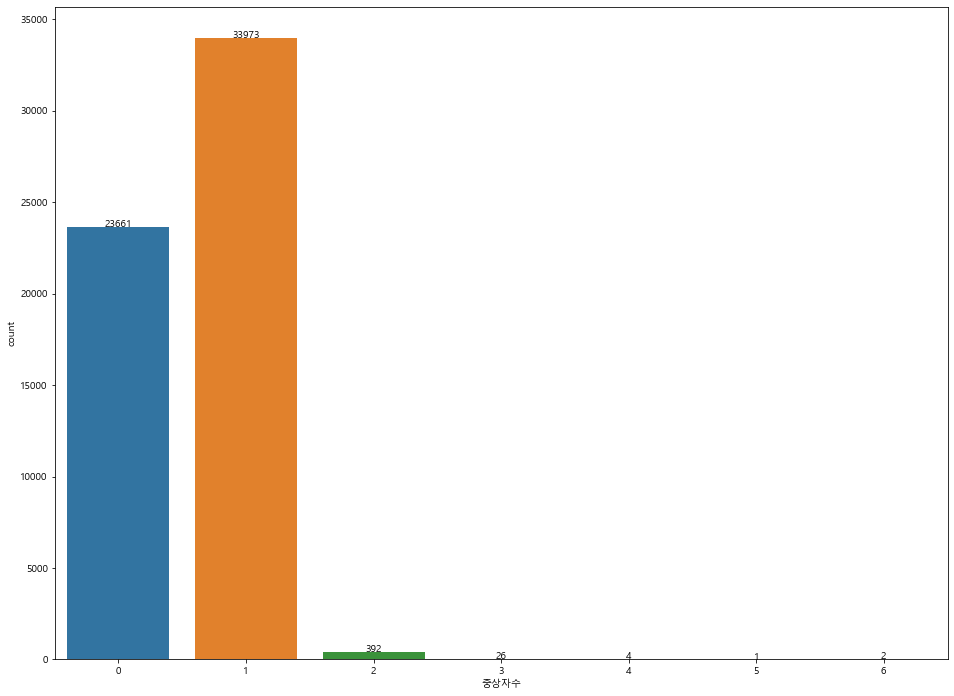

In [472]:
cnt = df["중상자수"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="중상자수", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [473]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,1,0,2,3,4,6,5
중상자수,33973,23661,392,26,4,2,1


In [536]:
(1-(len(df[df['중상자수']==0])/len(df['중상자수'])))*100

59.24662842970082

---

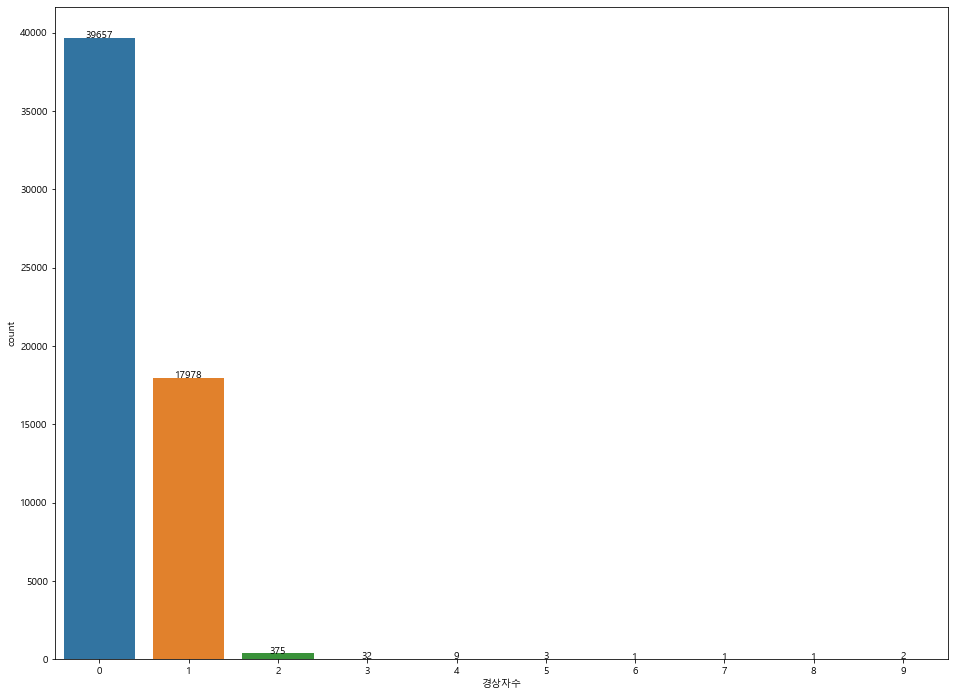

In [474]:
cnt = df["경상자수"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="경상자수", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [475]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0,1,2,3,4,5,9,8,7,6
경상자수,39657,17978,375,32,9,3,2,1,1,1


In [538]:
(1-(len(df[df['경상자수']==0])/len(df['경상자수'])))*100

31.695344391050483

---

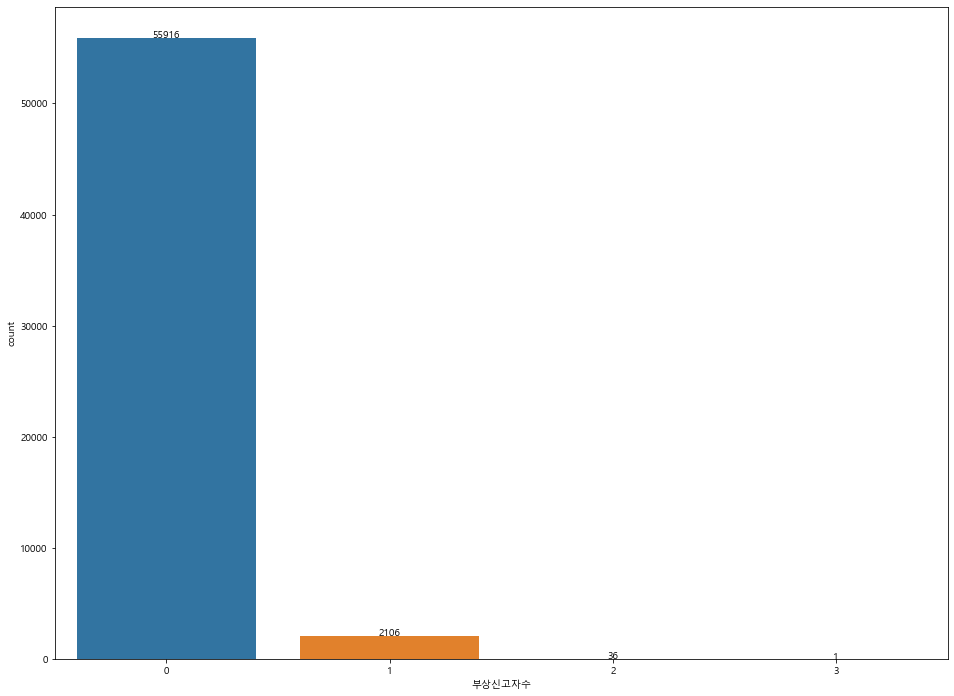

In [476]:
cnt = df["부상신고자수"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="부상신고자수", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [477]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0,1,2,3
부상신고자수,55916,2106,36,1


In [539]:
(1-(len(df[df['부상신고자수']==0])/len(df['부상신고자수'])))*100

3.6910728741452625

---

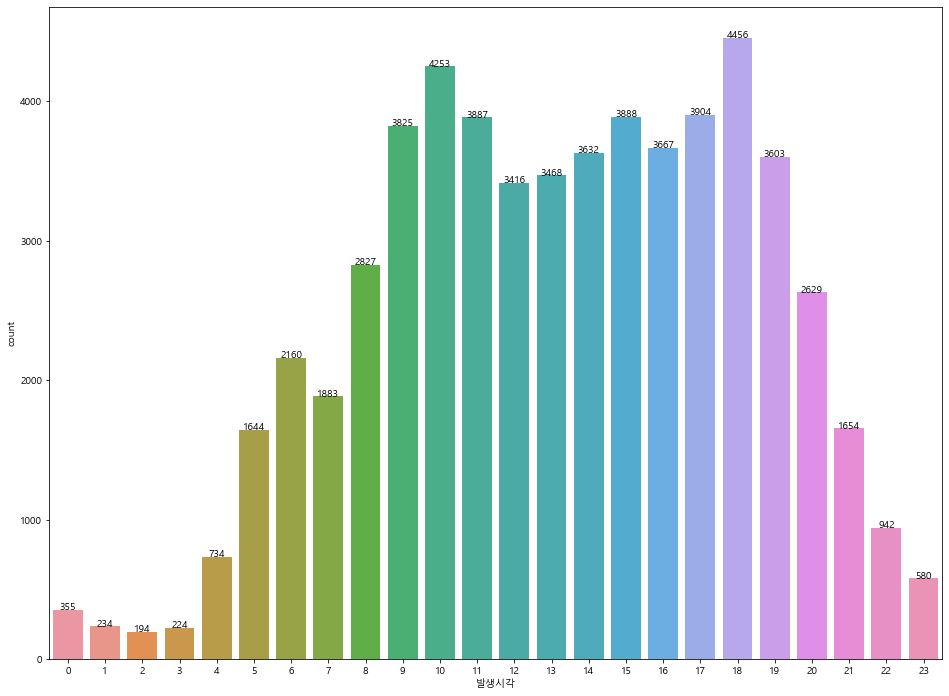

In [545]:
cnt = df["발생시각"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="발생시각", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

In [546]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,18,10,17,15,11,9,16,14,19,13,...,7,21,5,22,4,23,0,1,3,2
발생시각,4456,4253,3904,3888,3887,3825,3667,3632,3603,3468,...,1883,1654,1644,942,734,580,355,234,224,194


In [550]:
Q2 = df['발생시각'].quantile(.5)
Q2

13.0

In [556]:
sum=0
for i in range(11,19):
    sum+=len(df[df['발생시각']==i])
(sum/len(df['발생시각']))*100

52.21929416627913

---

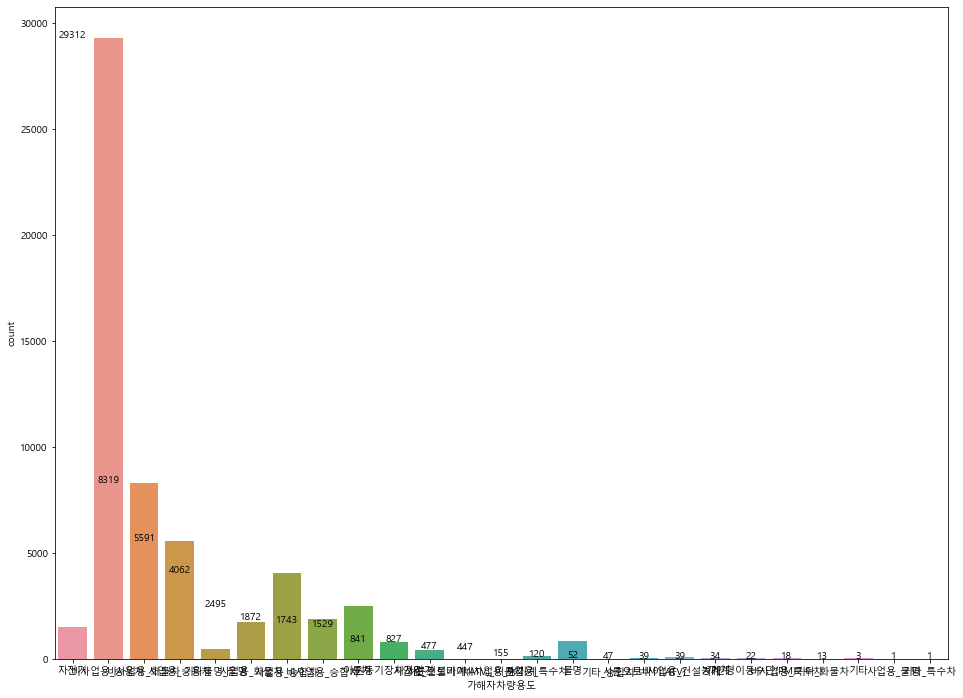

In [480]:
cnt = df["가해자차량용도"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
g = sns.countplot(data=df, x="가해자차량용도", ax=ax1)
for i in range(cnt.shape[0]):
    g.text(x=i, y=cnt[i], s=cnt[i], 
           horizontalalignment='center')

cnt = pd.DataFrame(cnt)
cnt.transpose()

In [481]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,비사업용_승용차,비사업용_화물차,사업용_승용차,사업용_승합차,이륜차,비사업용_승합차,사업용_화물차,자전거,불명,원동기장치자전거,...,개인형이동수단(PM),농기계,기타,사륜오토바이(ATV),비사업용_농기계,기타_승합차,사륜오토바이(ATV)_이륜차,기타_화물차,기타_특수차,사업용_불명
가해자차량용도,29312,8319,5591,4062,2495,1872,1743,1529,841,827,...,47,39,39,34,22,18,13,3,1,1


In [557]:
len(df[df['가해자차량용도']=='비사업용_승용차'])/len(df['가해자차량용도'])

0.5048657400230799

---

<AxesSubplot:xlabel='EPDO1', ylabel='count'>

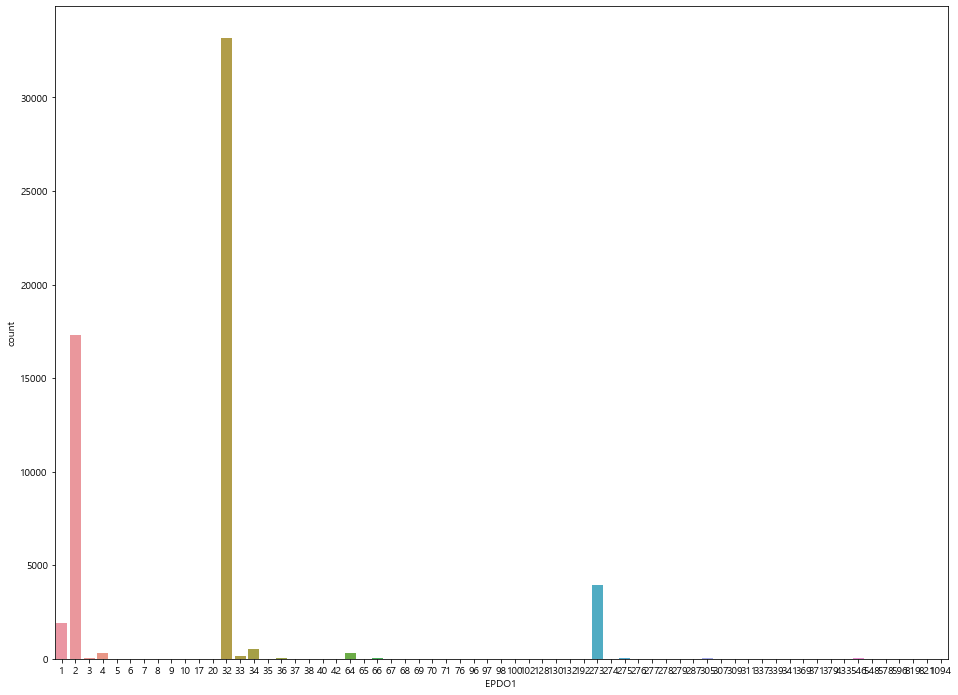

In [482]:
cnt = df["EPDO1"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=df, x="EPDO1", ax=ax1)


In [483]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,32,2,273,1,34,64,4,33,275,305,...,37,76,42,10,9,71,7,379,102,1094
EPDO1,33199,17311,3951,1890,522,333,316,129,61,59,...,1,1,1,1,1,1,1,1,1,1


---

<AxesSubplot:xlabel='EPDO2', ylabel='count'>

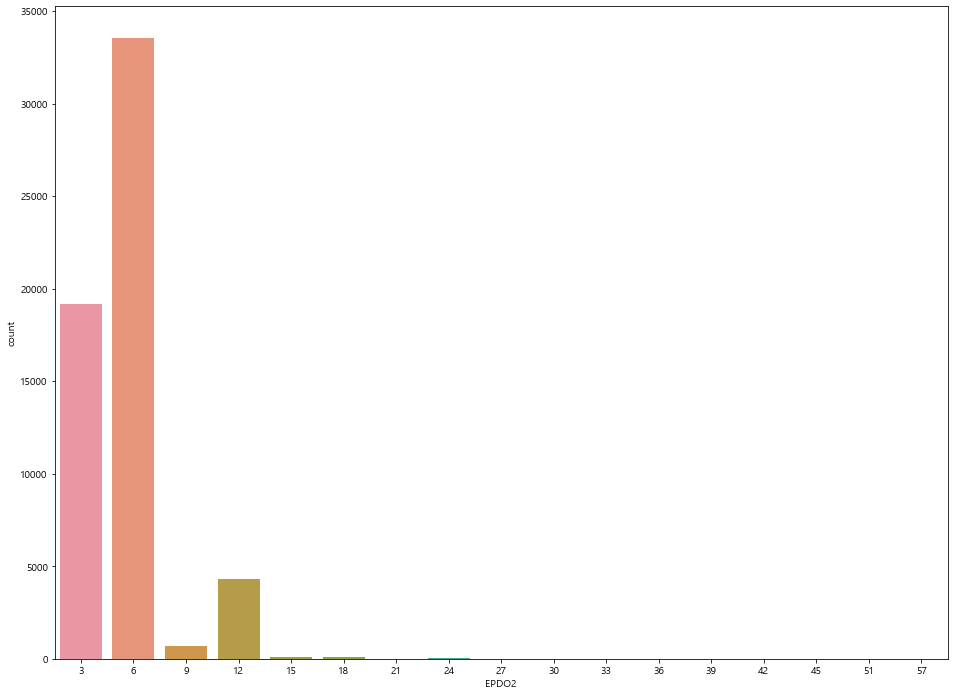

In [484]:
cnt = df["EPDO2"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=df, x="EPDO2", ax=ax1)


In [485]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,6,3,12,9,15,18,24,21,30,27,36,33,39,42,51,57,45
EPDO2,33578,19182,4331,674,115,98,32,16,11,11,3,3,1,1,1,1,1


---

<AxesSubplot:xlabel='심각도', ylabel='count'>

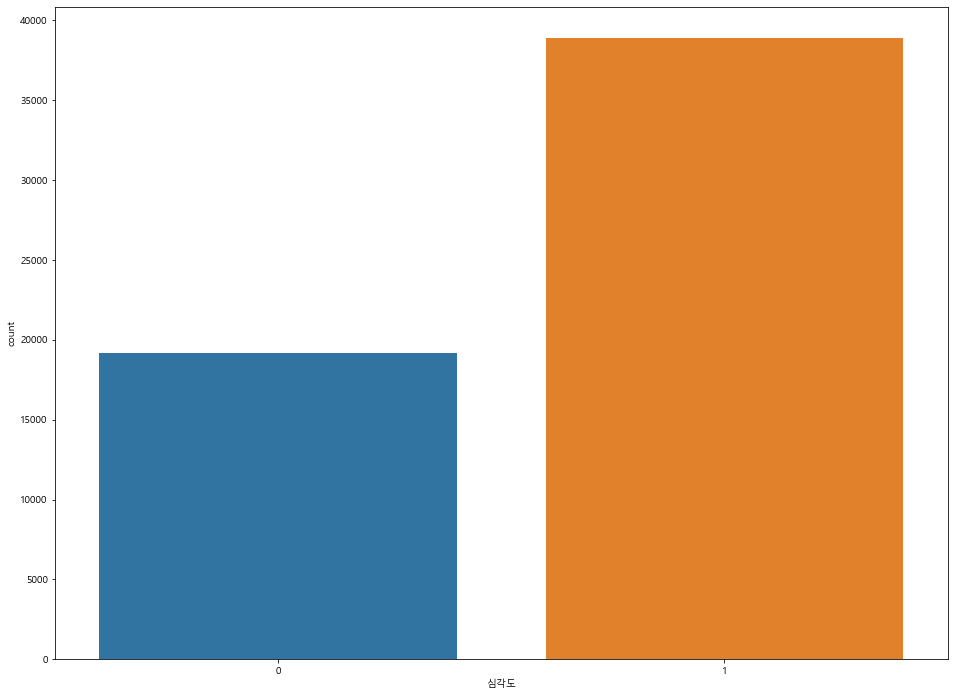

In [486]:
cnt = df["심각도"].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=df, x="심각도", ax=ax1)

In [487]:
cnt = pd.DataFrame(cnt)
cnt.transpose()

,1,0
심각도,38877,19182


---

---

 0   요일           58059 non-null  object

- 주말(토,일)에 비해 평일 사고 건수가 더 많다. 
- 주말 사고 발생률은 약 0.2161(21.61%)이고 그 중 일요일 사고 발생률은 약 0.0886 (8.86%)이다.

 1   사고내용         58059 non-null  object

- 중상 사고건수가 월등히 많이 존재한다. => 대부분의 고령 보행자 사고는 중상으로 이어진다. 전체 사고 중 약 0.5909 (59.09%) 차지

 2   사고유형         58059 non-null  object

- 대부분의 고령 보행자 사고는 횡단 중 발생하며 전체 사고 유형 중 약 47.92% 차지한다.

 3   가해자성별        58059 non-null  object

-  가해자 성별은 대부분 남성이다.

 4   피해자성별        58059 non-null  object

- 피해자 성별은 대부분 여성이다. 

 5   연령가해자        58059 non-null  int64 

- 50대가 가장 많으며 주로 40대-50대이다. (50대를 기준으로 종모양 분포)

 6   연령피해자        58059 non-null  int64 

- 65세 이상으로 전처리를 진행했기 때문에 의미가 없다.

 7   가해자음주        58059 non-null  object

- 데이터를 보았을 때, 기타불명 과 해당 없음이 상당수 많아 ‘음주운전’인 경우가 약 2.15% 밖에 존재하지 않는다. 
- 음주운전이 고령보행자 사고에 큰 영향을 끼치지 않는 것으로 보인다.

 8   법규위반가해자      58059 non-null  object

- ‘안전운전 의무 불이행’ 이 가장 높게 나왔으나, 사고 조사 당시 ‘과속’ 등과 같은 법령을 피하기 위해 ‘안전운전 의무 불이행’으로 법규위반 명이 들어간 경우가 있다. 이를 고려했을 때 빈도분석만으로는 <법규위반가해자> 컬럼을 판단하기 어렵다.

 9   행동유형가해자      58059 non-null  object

- ‘직진중’ 발생 한 사고가 전체 대비 약 54.82%로 상당수를 차지하고 있으며, U턴중, 출발중, 진로변경중, 주행 중 대기, 앞지르기 중의 경우 발생 건수가 상당히 작다. 

 10  신체상해정도가해자    58059 non-null  object

- 상해없음이 월등히 많다.

 11  신체상해정도피해자    58059 non-null  object

- 중상으로 이어지는 경우가 월등히 많으며, 경상자 수도 약 30.55%로 다수 있다.
- 부상신고보다는 사망자 수가 많다.

 12  가해자신체상해주부위   58059 non-null  object

- 상해 없음이 약 98.86%으로 대부분 다치지 않는 것으로 나타난다.

 13  피해자신체상해주부위   58059 non-null  object

- 신체상해가 적은 가해자에 비해 피해자는 ‘허리’ (약 13.72%), ‘머리’ (약 11.5%), ‘하퇴부’ (약 10.47%)으로 나타났다.
- 즉, 기타/상해없음/불명이 전체 대비 약 22.9%이므로 피해자는 가해자에 비해 상해 발생률이 약 77.1%이다.
  
 14  차량용도가해자_중분류  58059 non-null  object

- 승용차에 의해 많은 사고가 발생 
- 승용차 (약 50.29%) / 화물차 (약 17.02%) 그 외......

 15  도로종류         58059 non-null  object

- 특별광역시도 (약 41.21%), 시도 (약 32.06%) 으로 두 속성 값이 월등히 많다.

 16  도로형태         58059 non-null  object

- 단일로 (약 56.50%), 교차로 (약 37.68%)으로 두 속성 값이 월등히 많다. 
-교차로보다 교차로가 아닌 곳에서 사고가 더 많이 발생함을 알 수 있다.

 17  노인보호구역_여부    58059 non-null  object

- 노인보호구역이 아닌 곳에서 사고 발생률이 높다. 
  (아니요: 58018 / 예: 41)

 18  어린이보호구역_여부   58059 non-null  object

- 어린이보호구역이 아닌 곳에서 사고 발생률이 높다.
  (아니요: 57846 / 예: 213)

 19  자전거도로_여부     34691 non-null  object

- 자전거도로가 아닌 곳에서 사고 발생률이 높다.
  (아니요: 34574 / 예: 117)

 20  도로선형         58059 non-null  object

- 평지에서 사고가 월등히 많이 발생하였다. (약 83.15%)
- 오르막/내리막인 경우 즉, 경사로는 약 11.41%이다.
 
 21  기상상태         58059 non-null  object

- 대체로 맑은 날씨에 사고가 발생한 것으로 보아 (약 89.12%) 날씨가 고령 보행자 사고에 큰 영향을 준다고 볼 수 없다.

 22  노면상태         58059 non-null  object

- 기상상태와 마찬가지로 노면상태 역시 ‘건조’일 때 사고가 많이 발생하였다. 
- 젖음/습기의 경우 약 8.07%로 기상 및 노면 상태는 고령 보행자 사고에 큰 영향을 끼치지 않는 것으로 보인다.

 23  교차로형태        58059 non-null  object

- <도로형태>의 결과와 마찬가지로 ‘교차로아님’에서 더 많은 사고가 발생한 것으로 보인다. 
- 두 컬럼 중 하나는 삭제해도 될 것 같다.

 24  사망자수         58059 non-null  int64 

- 전체 사고 중 고령보행자 교통사고 발생 시 사망으로 이어질 확률은 약 7.15%로 나타났다.

 25  중상자수         58059 non-null  int64 

- 전체 사고 중 고령보행자 교통사고 발생 시 중상으로 이어질 확률은 약 59.25%로 나타났다. 즉, 대부분의 사고가 중상으로 이어진다는 것이다.

 26  경상자수         58059 non-null  int64 

- 전체 사고 중 고령보행자 교통사고 발생 시 중상으로 이어질 확률은 약 31.7%로 나타났다.

 27  부상신고자수       58059 non-null  int64 

- 전체 사고 중 고령보행자 교통사고 발생 시 중상으로 이어질 확률은 약 3.7%로 나타났다.
 
 28  발생시각         58059 non-null  int64 

- 9시, 10시, 11시, 12시, 13시,, 14시, 15시, 16시, 17시, 18시에 사고가 많이 발생했으며,
  11시-18시 사이 발생 => 약 52.22%

 29  EPDO1        58059 non-null  int64 

- 
 30  EPDO2        58059 non-null  int64 

 31  가해자차량용도      58059 non-null  object => 차량용도가해자_중분류 사용

- 비사업용_승용차 사고 발생률은 약 50.49%로 <차량용도가해자_중분류>의 결과와 유사하다.
 
 32  심각도          58059 non-null  int64 